<a href="https://colab.research.google.com/github/rahmaum/aumiya/blob/main/Indonesian_Investment_Platform_Startup.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# OVERVIEW

## DATA DESCRIPTION
### Users Dataset
*   User information such as user id, gender, age, occupation, and income.
*   https://docs.google.com/spreadsheets/d/1fZMj1-CYWZ3oO3p125704E_UTHyz7C33iOnAbRwCRag/edit?usp=sharing

### Daily Users Balance Dataset
*   Detail of daily users balance in September 2021
*   https://docs.google.com/spreadsheets/d/17YaJvIuZ2UMFNNhq4AJGptmSQvqvsJI4fnR5uSw0yBE/edit?usp=sharing






# Libaries


In [ ]:
# Data Cleaning - EDA/
import pandas as pd                     #to perform advanced data analysis, import data quickly
import numpy as np                      #to perform arge mahematical operations and statistical operation
from datetime import datetime           #to perform manipulating dates and times

#To show chart
import seaborn as sns                   #to perform visualization with many color palettes, beatifull style and many statistical plots
import matplotlib.pyplot as plt         # to perform simple interactive visualization



# DATA CLEANING

**USER DATASET**

In [ ]:
# import dataset from spreadsheet
sheet_url = 'https://drive.google.com/file/d/11PIWh0ksBPsnC6Hm-idkid0nPUfMkeEf/view?usp=sharing' 
#use this trick to get the id of the file
sheet = 'https://drive.google.com/uc?id=' + sheet_url.split('/')[-2] 

#add sep=',' parameter to pandas read_csv function in order to tell the function, to use semicolon (,) as separator
dfuser = pd.read_csv (sheet, sep=',') 
dfuser.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14712 entries, 0 to 14711
Data columns (total 8 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   user_id                       14712 non-null  int64 
 1   registration_import_datetime  14712 non-null  object
 2   user_gender                   14712 non-null  object
 3   user_age                      14712 non-null  int64 
 4   user_occupation               14712 non-null  object
 5   user_income_range             14712 non-null  object
 6   referral_code_used            5604 non-null   object
 7   user_income_source            14712 non-null  object
dtypes: int64(2), object(6)
memory usage: 919.6+ KB


**DAILY BALANCE DATASET**

In [ ]:
# import dataset from spreadsheet
sheet_url = 'https://drive.google.com/file/d/1uq_iZE0fWIp8qdDa-AC9OXx3BlgzTir3/view?usp=sharing' 
#use this trick to get the id of the file
sheet = 'https://drive.google.com/uc?id=' + sheet_url.split('/')[-2] 

#add sep=',' parameter to pandas read_csv function in order to tell the function, to use semicolon (,) as separator
dfbalance = pd.read_csv (sheet, sep=',') 
dfbalance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158811 entries, 0 to 158810
Data columns (total 14 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   user_id                              158811 non-null  int64  
 1   date                                 158811 non-null  object 
 2   Saham_AUM                            106292 non-null  float64
 3   Saham_invested_amount                106292 non-null  float64
 4   Saham_transaction_amount             100839 non-null  float64
 5   Pasar_Uang_AUM                       131081 non-null  float64
 6   Pasar_Uang_invested_amount           131081 non-null  float64
 7   Pasar_Uang_transaction_amount        124273 non-null  float64
 8   Pendapatan_Tetap_AUM                 105946 non-null  float64
 9   Pendapatan_Tetap_invested_amount     105946 non-null  float64
 10  Pendapatan_Tetap_transaction_amount  100497 non-null  float64
 11  Campuran_AUM 



---



## Remove Unused Value

*Remove regristration_import_date and referral_code_used because they are not needed for future analysis*

In [ ]:
dfuser.drop('registration_import_datetime', inplace=True, axis=1)
dfuser.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14712 entries, 0 to 14711
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   user_id             14712 non-null  int64 
 1   user_gender         14712 non-null  object
 2   user_age            14712 non-null  int64 
 3   user_occupation     14712 non-null  object
 4   user_income_range   14712 non-null  object
 5   referral_code_used  5604 non-null   object
 6   user_income_source  14712 non-null  object
dtypes: int64(2), object(5)
memory usage: 804.7+ KB


In [ ]:
dfuser.drop('referral_code_used', inplace=True, axis=1)
dfuser.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14712 entries, 0 to 14711
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   user_id             14712 non-null  int64 
 1   user_gender         14712 non-null  object
 2   user_age            14712 non-null  int64 
 3   user_occupation     14712 non-null  object
 4   user_income_range   14712 non-null  object
 5   user_income_source  14712 non-null  object
dtypes: int64(2), object(4)
memory usage: 689.8+ KB


*Checking typo or unusual value*

In [ ]:
categorical_col = ['user_gender','user_occupation','user_income_range','user_income_source']
for col in categorical_col :
  print ('Value counts on', col, 'column:')
  print (dfuser[col].value_counts())
  print ('\n)')

Value counts on user_gender column:
Male      8977
Female    5735
Name: user_gender, dtype: int64

)
Value counts on user_occupation column:
Pelajar       7887
Swasta        3263
Others        1683
IRT            934
Pengusaha      598
PNS            191
Guru           106
TNI/Polisi      45
Pensiunan        5
Name: user_occupation, dtype: int64

)
Value counts on user_income_range column:
< 10 Juta                   6275
Rp 10 Juta - 50 Juta        4816
> Rp 50 Juta - 100 Juta     2390
> Rp 100 Juta - 500 Juta    1114
> Rp 500 Juta - 1 Miliar      90
> Rp 1 Miliar                 27
Name: user_income_range, dtype: int64

)
Value counts on user_income_source column:
Gaji                     9131
Keuntungan Bisnis        1908
Dari Orang Tua / Anak    1307
Undian                   1001
Tabungan                  419
Lainnya                   414
Dari Suami / istri        300
Hasil Investasi           165
Warisan                    43
Bunga Simpanan             24
Name: user_income_source,

*Categorizing PNS, Guru, and TNI/Polisi as a new group of PNS. And putting Pensiunan as in group OTHERS. Because counts on user income above 500 juta and 1 miliar is a small amount, we group it as category 100 juta, so it won't be an outliers*

In [ ]:
dfuser.loc[dfuser['user_occupation'] == 'Guru','user_occupation'] = 'PNS'
dfuser.loc[dfuser['user_occupation'] == 'TNI/Polisi','user_occupation'] = 'PNS'
dfuser.loc[dfuser['user_occupation'] == 'Pensiunan','user_occupation'] = 'Others'

dfuser.loc[dfuser['user_income_range'] == '> Rp 500 Juta - 1 Miliar','user_income_range'] = '> Rp 100 Juta - 500 Juta'
dfuser.loc[dfuser['user_income_range'] == '> Rp 1 Miliar','user_income_range'] = '> Rp 100 Juta - 500 Juta'

categorical_col = ['user_occupation','user_income_range']
for col in categorical_col :
  print ('Value counts on', col, 'column:')
  print (dfuser[col].value_counts())
  print ('\n)')

Value counts on user_occupation column:
Pelajar      7887
Swasta       3263
Others       1688
IRT           934
Pengusaha     598
PNS           342
Name: user_occupation, dtype: int64

)
Value counts on user_income_range column:
< 10 Juta                   6275
Rp 10 Juta - 50 Juta        4816
> Rp 50 Juta - 100 Juta     2390
> Rp 100 Juta - 500 Juta    1231
Name: user_income_range, dtype: int64

)


*We will only analyze the data in September so we drop values that placed other than that.*

In [ ]:
#Select dataset within timeframe September 2021

dfsep21 = dfbalance.loc[(dfbalance['date'] >= '2021-09-01')
                     & (dfbalance['date'] <= '2021-09-30')]
dfsep21.head()

,user_id,date,Saham_AUM,Saham_invested_amount,Saham_transaction_amount,Pasar_Uang_AUM,Pasar_Uang_invested_amount,Pasar_Uang_transaction_amount,Pendapatan_Tetap_AUM,Pendapatan_Tetap_invested_amount,Pendapatan_Tetap_transaction_amount,Campuran_AUM,Campuran_invested_amount,Campuran_transaction_amount
2,50701,2021-09-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9956556.00,10000000.00,0.00
3,50701,2021-09-02,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9914858.00,10000000.00,0.00
4,50701,2021-09-03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,10016360.00,10000000.00,0.00
5,50701,2021-09-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9995062.00,10000000.00,0.00
6,50701,2021-09-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,9964287.00,10000000.00,0.00




---



## Duplicated Values

In [ ]:
# check number of duplicated data
dfuser.duplicated().sum()

0

In [ ]:
# check number of duplicated data
dfsep21.duplicated().sum()

0

*There are no duplicated values.*

## Handling Missing Values

In [ ]:
# Check number of NaN Value in each column
dfuser.isna().sum()

user_id               0
user_gender           0
user_age              0
user_occupation       0
user_income_range     0
user_income_source    0
dtype: int64

*No missing value, no handling needed.*

In [ ]:
# Check number of NaN Value in each column
dfsep21.isna().sum()

user_id                                     0
date                                        0
Saham_AUM                               42420
Saham_invested_amount                   42420
Saham_transaction_amount                45782
Pasar_Uang_AUM                          22294
Pasar_Uang_invested_amount              22294
Pasar_Uang_transaction_amount           26543
Pendapatan_Tetap_AUM                    42206
Pendapatan_Tetap_invested_amount        42206
Pendapatan_Tetap_transaction_amount     45596
Campuran_AUM                           123699
Campuran_invested_amount               123699
Campuran_transaction_amount            123821
dtype: int64

*The missing value in columns other than user_id and date means there are no transaction. So we will change the value into zeros. *

In [ ]:
# because if there is no transaction, the NaN values will be 0

dfsep21.fillna(0)


,user_id,date,Saham_AUM,Saham_invested_amount,Saham_transaction_amount,Pasar_Uang_AUM,Pasar_Uang_invested_amount,Pasar_Uang_transaction_amount,Pendapatan_Tetap_AUM,Pendapatan_Tetap_invested_amount,Pendapatan_Tetap_transaction_amount,Campuran_AUM,Campuran_invested_amount,Campuran_transaction_amount
2,50701,2021-09-01,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,9956556.00,10000000.00,0.00
3,50701,2021-09-02,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,9914858.00,10000000.00,0.00
4,50701,2021-09-03,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,10016360.00,10000000.00,0.00
5,50701,2021-09-06,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,9995062.00,10000000.00,0.00
6,50701,2021-09-07,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,9964287.00,10000000.00,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
158806,4165020,2021-09-30,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
158807,4165132,2021-09-30,0.00,0.00,0.00,10001.00,10000.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
158808,4165630,2021-09-30,41625.00,40000.00,0.00,10001.00,10000.00,0.00,49869.00,50000.00,0.00,0.00,0.00,0.00
158809,4165704,2021-09-30,0.00,0.00,0.00,0.00,0.00,0.00,9987.00,10000.00,0.00,0.00,0.00,0.00




---



## Convert Data Types

In [ ]:
# Convert Integer value to string
dfuser['user_id'] = dfuser['user_id'].astype(str)

# Check data information
dfuser.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14712 entries, 0 to 14711
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   user_id             14712 non-null  object
 1   user_gender         14712 non-null  object
 2   user_age            14712 non-null  int64 
 3   user_occupation     14712 non-null  object
 4   user_income_range   14712 non-null  object
 5   user_income_source  14712 non-null  object
dtypes: int64(1), object(5)
memory usage: 689.8+ KB


In [ ]:
from pandas.core.arrays.integer import Int64Dtype

# Convert Integer value to string
dfsep21['user_id'] = dfsep21['user_id'].astype(str)

#Convert String to Datetime
dfsep21['date'] = pd.to_datetime(dfsep21['date'])

# Check data information
dfsep21.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 127766 entries, 2 to 158810
Data columns (total 14 columns):
 #   Column                               Non-Null Count   Dtype         
---  ------                               --------------   -----         
 0   user_id                              127766 non-null  object        
 1   date                                 127766 non-null  datetime64[ns]
 2   Saham_AUM                            85346 non-null   float64       
 3   Saham_invested_amount                85346 non-null   float64       
 4   Saham_transaction_amount             81984 non-null   float64       
 5   Pasar_Uang_AUM                       105472 non-null  float64       
 6   Pasar_Uang_invested_amount           105472 non-null  float64       
 7   Pasar_Uang_transaction_amount        101223 non-null  float64       
 8   Pendapatan_Tetap_AUM                 85560 non-null   float64       
 9   Pendapatan_Tetap_invested_amount     85560 non-null   float64       
 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys




---



## Handling Outliers

*There are no numerical value in user dataset, so we can let it be.*

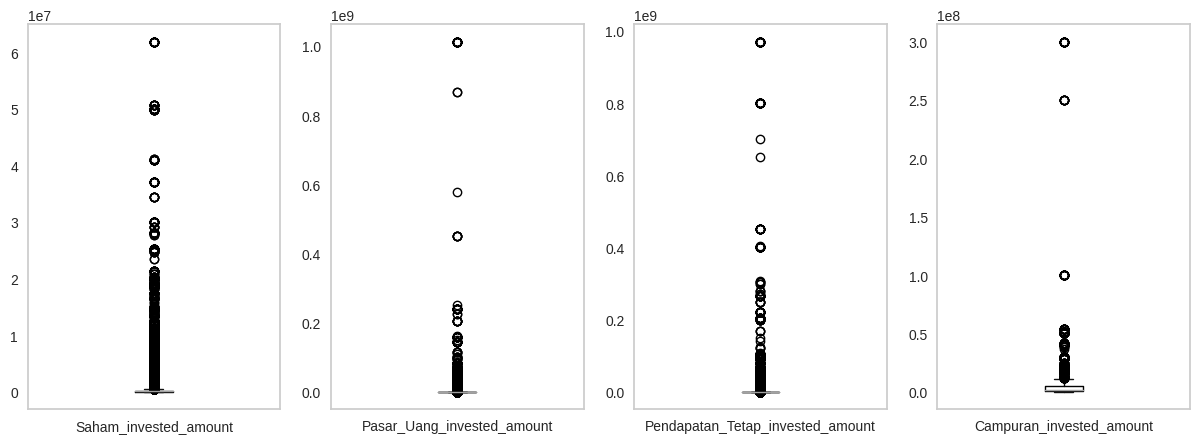

In [ ]:
# filter numeric column
numeric_column = ['Saham_invested_amount','Pasar_Uang_invested_amount','Pendapatan_Tetap_invested_amount','Campuran_invested_amount']

#adjust chart position and chart size
fig, axes = plt.subplots(nrows=1, ncols=4,figsize=(15,5))

# for 0 (i) , Income (el)
for i,el in enumerate(numeric_column):
    a = dfsep21.boxplot(el, ax=axes.flatten()[i],grid=False)

#Show Chart
plt.show()

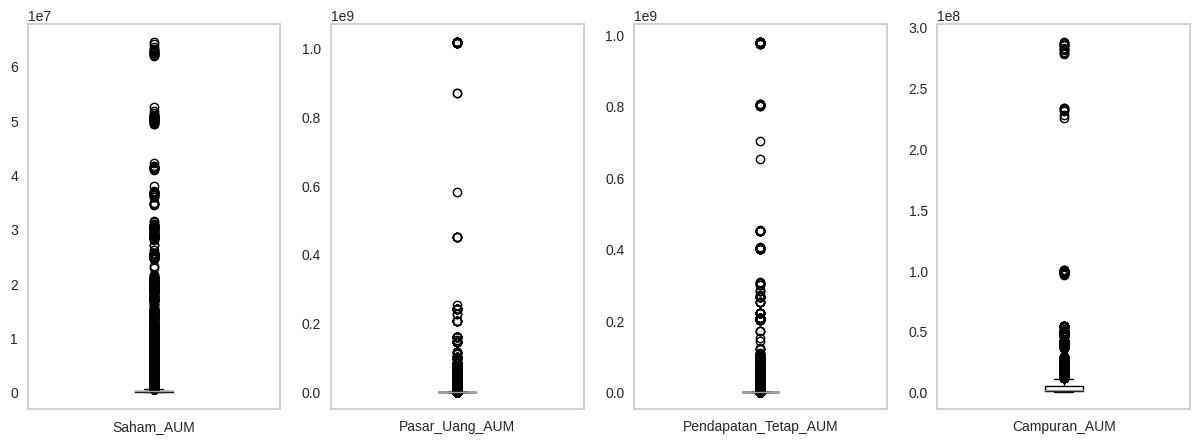

In [ ]:
# filter numeric column
numeric_column = ['Saham_AUM','Pasar_Uang_AUM','Pendapatan_Tetap_AUM','Campuran_AUM']

#adjust chart position and chart size
fig, axes = plt.subplots(nrows=1, ncols=4,figsize=(15,5))

# for 0 (i) , Income (el)
for i,el in enumerate(numeric_column):
    a = dfsep21.boxplot(el, ax=axes.flatten()[i],grid=False)

#Show Chart
plt.show()

**The data outliers were not excluded because they are still a research phenomenon, and should still be used.**

---



## Rename columns

In [ ]:
dfsep21.rename(columns = {'Saham_AUM':'Stocks_AUM'}, inplace = True)
dfsep21.rename(columns = {'Saham_invested_amount':'Stocks_invested'}, inplace = True)
dfsep21.rename(columns = {'Saham_transaction_amount':'Stocks_transaction'}, inplace = True)
dfsep21.rename(columns = {'Pasar_Uang_AUM':'MoneyMarket_AUM'}, inplace = True)
dfsep21.rename(columns = {'Pasar_Uang_invested_amount':'MoneyMarket_invested'}, inplace = True)
dfsep21.rename(columns = {'Pasar_Uang_transaction_amount':'MoneyMarket_transaction'}, inplace = True)
dfsep21.rename(columns = {'Pendapatan_Tetap_AUM':'Fixed_AUM'}, inplace = True)
dfsep21.rename(columns = {'Pendapatan_Tetap_invested_amount':'Fixed_invested'}, inplace = True)
dfsep21.rename(columns = {'Pendapatan_Tetap_transaction_amount':'Fixed_transaction'}, inplace = True)
dfsep21.rename(columns = {'Campuran_AUM':'Mixed_AUM'}, inplace = True)
dfsep21.rename(columns = {'Campuran_invested_amount':'Mixed_invested'}, inplace = True)
dfsep21.rename(columns = {'Campuran_transaction_amount':'Mixed_transaction'}, inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:5047: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [ ]:
dfsep21.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 127766 entries, 2 to 158810
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   user_id                  127766 non-null  object        
 1   date                     127766 non-null  datetime64[ns]
 2   Stocks_AUM               85346 non-null   float64       
 3   Stocks_invested          85346 non-null   float64       
 4   Stocks_transaction       81984 non-null   float64       
 5   MoneyMarket_AUM          105472 non-null  float64       
 6   MoneyMarket_invested     105472 non-null  float64       
 7   MoneyMarket_transaction  101223 non-null  float64       
 8   Fixed_AUM                85560 non-null   float64       
 9   Fixed_invested           85560 non-null   float64       
 10  Fixed_transaction        82170 non-null   float64       
 11  Mixed_AUM                4067 non-null    float64       
 12  Mixed_invested  

# DATA TRANSFORMATION

## End of Period AUM and Balance

**END OF PERIOD AUM**

In [ ]:
# select aum for each user
aumdf = dfsep21.copy()
aumdf = aumdf[['user_id','date','Stocks_AUM','MoneyMarket_AUM','Fixed_AUM','Mixed_AUM']]

# only select end period
aumdf = aumdf.loc[aumdf['date'].dt.day == 30]
#Total AUM by user each fund
aumdf = aumdf.groupby(aumdf['user_id']).sum()
#average aum per user
aumdf['Total_AUM'] = aumdf.sum(axis=1)

aumdf.head()

,Stocks_AUM,MoneyMarket_AUM,Fixed_AUM,Mixed_AUM,Total_AUM
user_id,,,,,
1004326,94396.00,20065.00,90558.00,0.00,205019.00
1005053,153729.00,10002.00,39940.00,0.00,203671.00
1005165,10330.00,20044.00,70149.00,0.00,100523.00
1018814,0.00,0.00,0.00,0.00,0.00
1023627,103238.00,0.00,0.00,0.00,103238.00


**INVESTED AMOUNT**

In [ ]:
# select invested amount for each user
balance = dfsep21.copy()
balance = balance[['user_id','date','Stocks_invested','MoneyMarket_invested','Fixed_invested','Mixed_invested']]

# only select end period
balance = balance.loc[balance['date'].dt.day == 30]

#Total balance by user each fund
balance = balance.groupby(balance['user_id']).sum()

balance['Total_Balance'] = balance.sum(axis=1)
balance.head()

,Stocks_invested,MoneyMarket_invested,Fixed_invested,Mixed_invested,Total_Balance
user_id,,,,,
1004326,90000.00,20000.00,90000.00,0.00,200000.00
1005053,150000.00,10000.00,40000.00,0.00,200000.00
1005165,10000.00,20000.00,70000.00,0.00,100000.00
1018814,0.00,0.00,0.00,0.00,0.00
1023627,100000.00,0.00,0.00,0.00,100000.00


## Net Transaction

In [ ]:
# select transaction for each user
nettrans = dfsep21.copy()
nettrans = nettrans[['user_id','date','Stocks_transaction',
                     'MoneyMarket_transaction','Fixed_transaction','Mixed_transaction']]

#Total transaction by user each fund
nettrans = nettrans.groupby(nettrans['user_id']).sum()

nettrans.head()

,Stocks_transaction,MoneyMarket_transaction,Fixed_transaction,Mixed_transaction
user_id,,,,
1004326,0.00,0.00,0.00,0.00
1005053,0.00,0.00,0.00,0.00
1005165,0.00,0.00,0.00,0.00
1018814,0.00,-1300000.00,0.00,0.00
1023627,0.00,0.00,0.00,0.00


## Merge Data

In [ ]:
merge = pd.merge(dfuser, dfsep21, on=["user_id", "user_id"])

merge.head()

,user_id,user_gender,user_age,user_occupation,user_income_range,user_income_source,date,Stocks_AUM,Stocks_invested,Stocks_transaction,MoneyMarket_AUM,MoneyMarket_invested,MoneyMarket_transaction,Fixed_AUM,Fixed_invested,Fixed_transaction,Mixed_AUM,Mixed_invested,Mixed_transaction
0,3816789,Female,53,IRT,> Rp 50 Juta - 100 Juta,Gaji,2021-09-01,185205.00,190000.00,0.00,40095.00,40000.00,0.00,271605.00,270000.00,0.00,NaN,NaN,NaN
1,3816789,Female,53,IRT,> Rp 50 Juta - 100 Juta,Gaji,2021-09-02,183977.00,190000.00,0.00,40101.00,40000.00,0.00,271378.00,270000.00,0.00,NaN,NaN,NaN
2,3816789,Female,53,IRT,> Rp 50 Juta - 100 Juta,Gaji,2021-09-03,186481.00,190000.00,0.00,40107.00,40000.00,0.00,271402.00,270000.00,0.00,NaN,NaN,NaN
3,3816789,Female,53,IRT,> Rp 50 Juta - 100 Juta,Gaji,2021-09-06,189985.00,190000.00,0.00,40120.00,40000.00,0.00,271520.00,270000.00,0.00,NaN,NaN,NaN
4,3816789,Female,53,IRT,> Rp 50 Juta - 100 Juta,Gaji,2021-09-07,189241.00,190000.00,0.00,40126.00,40000.00,0.00,271663.00,270000.00,0.00,NaN,NaN,NaN


In [ ]:
#define newdf as copy of merge so we can manipulate merge safely
newdf = merge.copy()

#Check data information
newdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 127766 entries, 0 to 127765
Data columns (total 19 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   user_id                  127766 non-null  object        
 1   user_gender              127766 non-null  object        
 2   user_age                 127766 non-null  int64         
 3   user_occupation          127766 non-null  object        
 4   user_income_range        127766 non-null  object        
 5   user_income_source       127766 non-null  object        
 6   date                     127766 non-null  datetime64[ns]
 7   Stocks_AUM               85346 non-null   float64       
 8   Stocks_invested          85346 non-null   float64       
 9   Stocks_transaction       81984 non-null   float64       
 10  MoneyMarket_AUM          105472 non-null  float64       
 11  MoneyMarket_invested     105472 non-null  float64       
 12  MoneyMarket_tran

# EDA

# Descriptive Statistic

In [ ]:
# Data descriptive
desc_df = balance.copy()
desc_df = desc_df[['Stocks_invested','MoneyMarket_invested','Fixed_invested','Mixed_invested']].describe()

# Add kurtosis, skewness and variance row for data descriptice statistic
desc_df.loc['kurtosis'] = desc_df[['Stocks_invested','MoneyMarket_invested','Fixed_invested','Mixed_invested']].kurt() #show kurtosis statistic
desc_df.loc['skewness'] = desc_df[['Stocks_invested','MoneyMarket_invested','Fixed_invested','Mixed_invested']].skew() #show Skewness statistic
desc_df.loc['variance'] = desc_df[['Stocks_invested','MoneyMarket_invested','Fixed_invested','Mixed_invested']].var() #show variance statistic

desc_df

,Stocks_invested,MoneyMarket_invested,Fixed_invested,Mixed_invested
count,8277.00,8277.00,8277.00,8277.00
mean,336447.80,783348.49,1260824.00,189573.80
std,2034381.59,13572191.28,18366891.83,3937860.27
min,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.00
50%,0.00,10000.00,10000.00,0.00
75%,100000.00,100000.00,110000.00,0.00
max,61840000.00,1012200000.00,970000000.00,300000000.00
kurtosis,7.98,8.00,7.99,8.00
skewness,2.99,3.00,3.00,3.00


In [ ]:
# Change scientific number to float with 2 decimals
pd.set_option('display.float_format',lambda x: '%.2f'%x)

In [ ]:
# Let's check the number format (scientific format has changed into float)
desc_df

,Stocks_invested,MoneyMarket_invested,Fixed_invested,Mixed_invested
count,8277.00,8277.00,8277.00,8277.00
mean,336447.80,783348.49,1260824.00,189573.80
std,2034381.59,13572191.28,18366891.83,3937860.27
min,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.00
50%,0.00,10000.00,10000.00,0.00
75%,100000.00,100000.00,110000.00,0.00
max,61840000.00,1012200000.00,970000000.00,300000000.00
kurtosis,7.98,8.00,7.99,8.00
skewness,2.99,3.00,3.00,3.00


##Insight


1. There are 8277 user
2. Average invested amount for
   * Stocks : 336 K
   * Money Market : 783 K
   * Fixed Income : 1,26 M
   * Mixed Fund : 189 K
3. Minimum transaction for each investment area are zero, because the users  did not invest in some area. 
4. Maximal transaction for each area
   * Stocks : 61,8 M
   * Money Market : 1,012 B
   * Fixed Income : 970 M
   * Mixed Fund : 300 M
5. Normal distribution is if its value not less than -1 and no more than +1. The kurtosis and skewness from the data shows that the data distribution is not normal. 

---



# Data Visualization

# 1. Average AUM per User

In [ ]:
aumdf

,Stocks_AUM,MoneyMarket_AUM,Fixed_AUM,Mixed_AUM,Total_AUM
user_id,,,,,
1004326,94396.00,20065.00,90558.00,0.00,205019.00
1005053,153729.00,10002.00,39940.00,0.00,203671.00
1005165,10330.00,20044.00,70149.00,0.00,100523.00
1018814,0.00,0.00,0.00,0.00,0.00
1023627,103238.00,0.00,0.00,0.00,103238.00
...,...,...,...,...,...
988940,51610.00,290353.00,159974.00,0.00,501937.00
989618,978952.00,200526.00,1805203.00,0.00,2984681.00
990466,1065663.00,200447.00,769542.00,0.00,2035652.00


In [ ]:
# merge aum dataset with user dataset

usercopy = newdf[['user_id','user_gender','user_age','user_occupation']]

useraumcopy = usercopy.merge(aumdf, how = 'inner', on = 'user_id')

useraumcopy

,user_id,user_gender,user_age,user_occupation,Stocks_AUM,MoneyMarket_AUM,Fixed_AUM,Mixed_AUM,Total_AUM
0,3816789,Female,53,IRT,297141.00,40235.00,270673.00,0.00,608049.00
1,3816789,Female,53,IRT,297141.00,40235.00,270673.00,0.00,608049.00
2,3816789,Female,53,IRT,297141.00,40235.00,270673.00,0.00,608049.00
3,3816789,Female,53,IRT,297141.00,40235.00,270673.00,0.00,608049.00
4,3816789,Female,53,IRT,297141.00,40235.00,270673.00,0.00,608049.00
...,...,...,...,...,...,...,...,...,...
127761,3881981,Female,49,Pengusaha,20552649.00,10120409.00,40973968.00,0.00,71647026.00
127762,3881981,Female,49,Pengusaha,20552649.00,10120409.00,40973968.00,0.00,71647026.00
127763,3881981,Female,49,Pengusaha,20552649.00,10120409.00,40973968.00,0.00,71647026.00
127764,3881981,Female,49,Pengusaha,20552649.00,10120409.00,40973968.00,0.00,71647026.00


Because the data got duplicated, so we need to handle it first

In [ ]:
# check number of duplicated data
useraumcopy.duplicated().sum()

119489

In [ ]:
# to drop dulicated data
useraumcopy.drop_duplicates(inplace = True)

# to check duplicated data
useraumcopy.duplicated().sum()

0

In [ ]:
# create new series
useraumcopy.set_index('user_id')

,user_gender,user_age,user_occupation,Stocks_AUM,MoneyMarket_AUM,Fixed_AUM,Mixed_AUM,Total_AUM
user_id,,,,,,,,
3816789,Female,53,IRT,297141.00,40235.00,270673.00,0.00,608049.00
3802293,Female,47,PNS,9232900.00,1354013.00,3229577.00,0.00,13816490.00
3049927,Male,53,Swasta,41545.00,9997.00,49925.00,910285.00,1011752.00
3836491,Male,59,Others,0.00,10012.00,0.00,0.00,10012.00
3783302,Male,57,Swasta,0.00,0.00,107322.00,0.00,107322.00
...,...,...,...,...,...,...,...,...
3773859,Male,49,Swasta,0.00,0.00,0.00,0.00,0.00
3798265,Female,49,IRT,0.00,0.00,0.00,0.00,0.00
3670811,Male,49,Swasta,208469.00,130676.00,95113.00,0.00,434258.00


In [ ]:
# make a dataframe copy
EDA_1 = useraumcopy.copy()

# create new data frame to get the number of order
EDA_1 = EDA_1.groupby('user_gender')[['Stocks_AUM','MoneyMarket_AUM','Fixed_AUM','Mixed_AUM']].mean().reset_index()
EDA_1.columns = ['user gender','Stocks_AUM','MoneyMarket_AUM','Fixed_AUM','Mixed_AUM']
EDA_1

,user gender,Stocks_AUM,MoneyMarket_AUM,Fixed_AUM,Mixed_AUM
0,Female,371720.75,1292569.42,1585127.03,213876.09
1,Male,332779.95,481869.65,1071216.19,165562.40


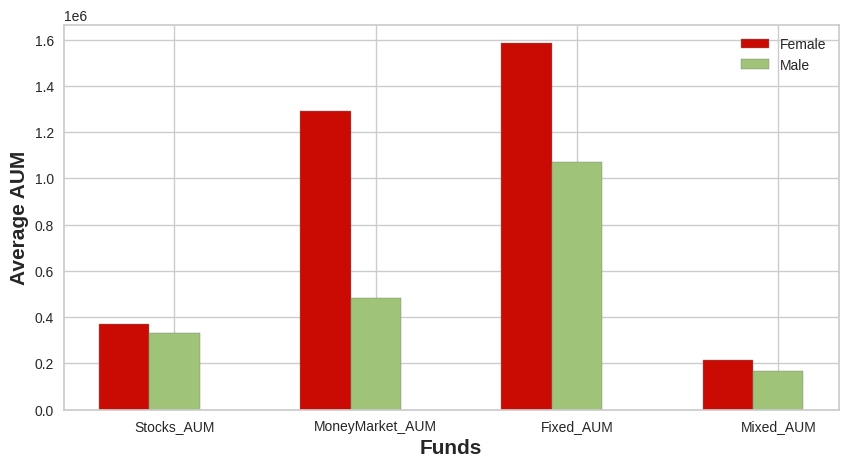

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# set width of bar
barWidth = 0.25
fig = plt.subplots(figsize =(10, 5))

# set height of bar
Female = [371720.75,	1292569.42,	1585127.03,	213876.09]
Male = [332779.95,	481869.65,	1071216.19,	165562.40]

# Set position of bar on X axis
br1 = np.arange(len(Female))
br2 = [x + barWidth for x in br1]


# Make the plot
plt.bar(br1, Female, color ='r', width = barWidth,
		edgecolor ='grey', label ='Female')
plt.bar(br2, Male, color ='g', width = barWidth,
		edgecolor ='grey', label ='Male')

# Adding Xticks
plt.xlabel('Funds', fontweight ='bold', fontsize = 15)
plt.ylabel('Average AUM', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(Female))],
		['Stocks_AUM','MoneyMarket_AUM','Fixed_AUM','Mixed_AUM'])

plt.legend()
plt.show()


In [ ]:
# make a dataframe copy
EDA_2 = useraumcopy.copy()

# create new data frame to get the number of order
EDA_2 = EDA_2.groupby('user_occupation')[['Stocks_AUM','MoneyMarket_AUM','Fixed_AUM','Mixed_AUM']].mean().reset_index()
EDA_2.columns = ['Occupation','Stocks_AUM','MoneyMarket_AUM','Fixed_AUM','Mixed_AUM']
EDA_2

,Occupation,Stocks_AUM,MoneyMarket_AUM,Fixed_AUM,Mixed_AUM
0,IRT,503740.64,3309701.50,3165796.54,246677.19
1,Others,408006.03,279290.59,780192.29,139553.77
2,PNS,608396.70,834506.00,821000.32,42873.06
3,Pelajar,197012.80,421346.78,444068.95,97146.17
4,Pengusaha,746373.66,2975247.52,7105197.30,1521504.48
5,Swasta,539703.40,879467.00,2015769.57,179894.16


In [ ]:
EDA_2.T

,0,1,2,3,4,5
Occupation,IRT,Others,PNS,Pelajar,Pengusaha,Swasta
Stocks_AUM,503740.64,408006.03,608396.70,197012.80,746373.66,539703.40
MoneyMarket_AUM,3309701.50,279290.59,834506.00,421346.78,2975247.52,879467.00
Fixed_AUM,3165796.54,780192.29,821000.32,444068.95,7105197.30,2015769.57
Mixed_AUM,246677.19,139553.77,42873.06,97146.17,1521504.48,179894.16


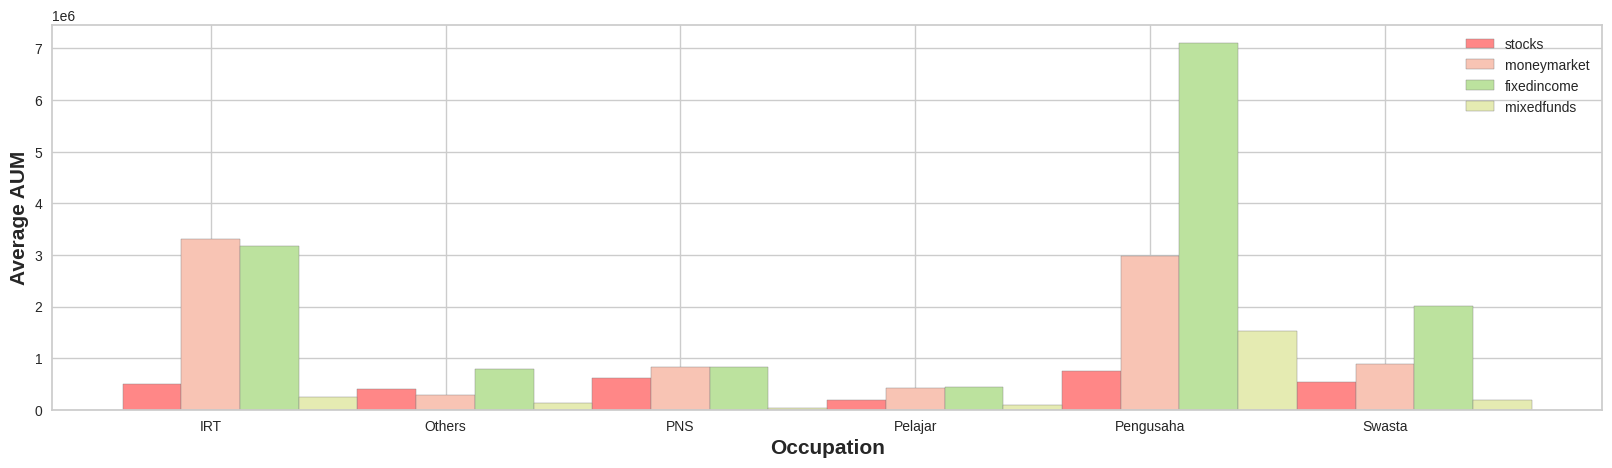

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# set width of bar
barWidth = 0.25
fig = plt.subplots(figsize =(20, 5))

# set height of bar
Stocks_AUM	= [503740.64,	408006.03,	608396.70,	197012.80,	746373.66,	539703.40]
MoneyMarket_AUM	=[3309701.50,	279290.59,	834506.00,	421346.78,	2975247.52,	879467.00]
Fixed_AUM	=[3165796.54,	780192.29,	821000.32,	444068.95,	7105197.30,	2015769.57]
Mixed_AUM	=[246677.19,	139553.77,	42873.06,	97146.17,	1521504.48,	179894.16]

# Set position of bar on X axis
br1 = np.arange(len(Stocks_AUM))
br2 = [x + barWidth for x in br1]
br3 = [x + barWidth for x in br2]
br4 = [x + barWidth for x in br3]

# Make the plot
plt.bar(br1, Stocks_AUM, color ='#FF8787', width = barWidth,
		edgecolor ='grey', label ='stocks')
plt.bar(br2, MoneyMarket_AUM, color ='#F8C4B4', width = barWidth,
		edgecolor ='grey', label ='moneymarket')
plt.bar(br3, Fixed_AUM, color ='#BCE29E', width = barWidth,
		edgecolor ='grey', label ='fixedincome')
plt.bar(br4, Mixed_AUM, color ='#E5EBB2', width = barWidth,
		edgecolor ='grey', label ='mixedfunds')

# Adding Xticks
plt.xlabel('Occupation', fontweight ='bold', fontsize = 15)
plt.ylabel('Average AUM', fontweight ='bold', fontsize = 15)
plt.xticks([r + barWidth for r in range(len(Stocks_AUM))],
		['IRT','Others','PNS','Pelajar','Pengusaha','Swasta'])

plt.legend()
plt.show()

##**Insight**
In one look, it shows that female user have a significant higher AUM than male user in money market and fixed AUM.
The occupation of user that invested the most are Businessman and housewives. They are mostly invested in money market and fixed funds too.

---



#2. Average Current Profit per user

In [ ]:
# merge aum dataset with user dataset

usercopy1 = newdf[['user_id','user_gender','user_age','user_occupation']]

useraumcopy1 = usercopy.merge(aumdf, how = 'inner', on = 'user_id')

useraumcopy1

,user_id,user_gender,user_age,user_occupation,Stocks_AUM,MoneyMarket_AUM,Fixed_AUM,Mixed_AUM,Total_AUM
0,3816789,Female,53,IRT,297141.00,40235.00,270673.00,0.00,608049.00
1,3816789,Female,53,IRT,297141.00,40235.00,270673.00,0.00,608049.00
2,3816789,Female,53,IRT,297141.00,40235.00,270673.00,0.00,608049.00
3,3816789,Female,53,IRT,297141.00,40235.00,270673.00,0.00,608049.00
4,3816789,Female,53,IRT,297141.00,40235.00,270673.00,0.00,608049.00
...,...,...,...,...,...,...,...,...,...
127761,3881981,Female,49,Pengusaha,20552649.00,10120409.00,40973968.00,0.00,71647026.00
127762,3881981,Female,49,Pengusaha,20552649.00,10120409.00,40973968.00,0.00,71647026.00
127763,3881981,Female,49,Pengusaha,20552649.00,10120409.00,40973968.00,0.00,71647026.00
127764,3881981,Female,49,Pengusaha,20552649.00,10120409.00,40973968.00,0.00,71647026.00


In [ ]:
# merge balance dataset with user dataset

usercopy2 = newdf[['user_id','user_gender','user_age','user_occupation']]

userbal1 = usercopy2.merge(balance, how = 'inner', on = 'user_id')

userbal1

,user_id,user_gender,user_age,user_occupation,Stocks_invested,MoneyMarket_invested,Fixed_invested,Mixed_invested,Total_Balance
0,3816789,Female,53,IRT,290000.00,40000.00,270000.00,0.00,600000.00
1,3816789,Female,53,IRT,290000.00,40000.00,270000.00,0.00,600000.00
2,3816789,Female,53,IRT,290000.00,40000.00,270000.00,0.00,600000.00
3,3816789,Female,53,IRT,290000.00,40000.00,270000.00,0.00,600000.00
4,3816789,Female,53,IRT,290000.00,40000.00,270000.00,0.00,600000.00
...,...,...,...,...,...,...,...,...,...
127761,3881981,Female,49,Pengusaha,20000000.00,10100000.00,41000000.00,0.00,71100000.00
127762,3881981,Female,49,Pengusaha,20000000.00,10100000.00,41000000.00,0.00,71100000.00
127763,3881981,Female,49,Pengusaha,20000000.00,10100000.00,41000000.00,0.00,71100000.00
127764,3881981,Female,49,Pengusaha,20000000.00,10100000.00,41000000.00,0.00,71100000.00


In [ ]:
# Join AUM and INVEST dataset
profit = pd.merge(useraumcopy1, userbal1, on=['user_id','user_gender','user_age','user_occupation'])


# Calculate profit = AUM - INVEST
profit['Total_profit'] = profit['Total_AUM'] - profit['Total_Balance']

profit.head()


,user_id,user_gender,user_age,user_occupation,Stocks_AUM,MoneyMarket_AUM,Fixed_AUM,Mixed_AUM,Total_AUM,Stocks_invested,MoneyMarket_invested,Fixed_invested,Mixed_invested,Total_Balance,Total_profit
0,3816789,Female,53,IRT,297141.00,40235.00,270673.00,0.00,608049.00,290000.00,40000.00,270000.00,0.00,600000.00,8049.00
1,3816789,Female,53,IRT,297141.00,40235.00,270673.00,0.00,608049.00,290000.00,40000.00,270000.00,0.00,600000.00,8049.00
2,3816789,Female,53,IRT,297141.00,40235.00,270673.00,0.00,608049.00,290000.00,40000.00,270000.00,0.00,600000.00,8049.00
3,3816789,Female,53,IRT,297141.00,40235.00,270673.00,0.00,608049.00,290000.00,40000.00,270000.00,0.00,600000.00,8049.00
4,3816789,Female,53,IRT,297141.00,40235.00,270673.00,0.00,608049.00,290000.00,40000.00,270000.00,0.00,600000.00,8049.00


In [ ]:
# make a dataframe copy
EDA_3 = profit.copy()

# create new data frame to get the number of order
EDA_3 = EDA_3.groupby('user_gender')[['Total_profit']].mean().reset_index()
EDA_3.columns = ['user gender','Total_profit']
EDA_3

,user gender,Total_profit
0,Female,17952.47
1,Male,7782.05


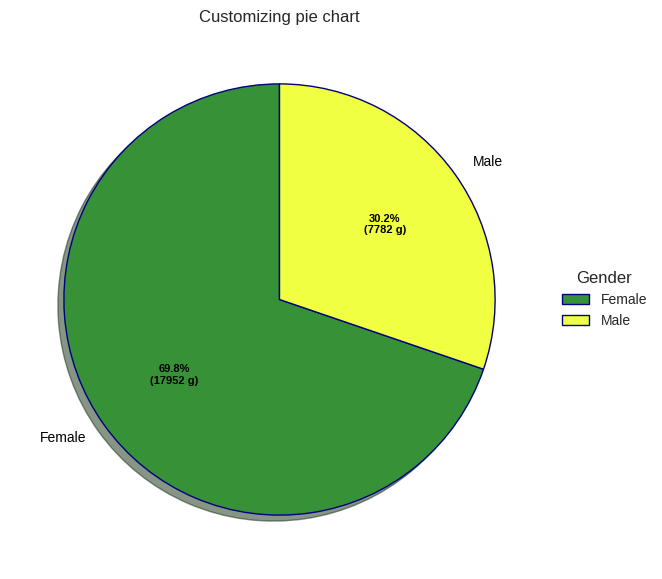

In [ ]:
# Import libraries
import numpy as np
import matplotlib.pyplot as plt


# Creating dataset
gender = ['Female','Male']

data = [17952.47,7782.05]


# Creating color parameters
colors = ('#379237','#F0FF42')

# Wedge properties
wp = { 'linewidth' : 1, 'edgecolor' : "navy" }

# Creating autocpt arguments
def func(pct, allvalues):
	absolute = int(pct / 100.*np.sum(allvalues))
	return "{:.1f}%\n({:d} g)".format(pct, absolute)

# Creating plot
fig, ax = plt.subplots(figsize =(10, 7))
wedges, texts, autotexts = ax.pie(data,
								autopct = lambda pct: func(pct, data),
								labels = gender,
								shadow = True,
								colors = colors,
								startangle = 90,
								wedgeprops = wp,
								textprops = dict(color ="black"))

# Adding legend
ax.legend(wedges, gender,
		title ="Gender",
		loc ="center left",
		bbox_to_anchor =(1, 0, 0.5, 1))

plt.setp(autotexts, size = 8, weight ="bold")
ax.set_title("Customizing pie chart")

# show plot
plt.show()



In [ ]:
# make a dataframe copy
EDA_4 = profit.copy()

# create new data frame to get the number of order
EDA_4 = EDA_4.groupby('user_occupation')[['Total_profit']].mean().reset_index()
EDA_4.columns = ['occupation','Total_profit']
EDA_4

,occupation,Total_profit
0,IRT,30268.51
1,Others,21245.33
2,PNS,25055.92
3,Pelajar,3427.44
4,Pengusaha,-41181.47
5,Swasta,31095.39


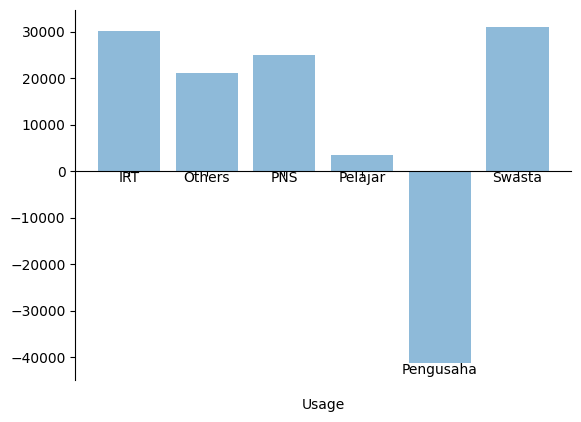

In [ ]:
import matplotlib.pyplot as plt 
plt.rcdefaults()
import numpy as np
import matplotlib.pyplot as plt

objects = EDA_4['occupation']
y_pos = np.arange(len(objects))
performance = EDA_4['Total_profit']

plt.bar(y_pos, performance, align='center', alpha=0.5)
# Get the axes object
ax = plt.gca()
# remove the existing ticklabels
ax.set_xticklabels([])
# remove the extra tick on the negative bar
ax.set_xticks([idx for (idx, x) in enumerate(performance) if x > 0])
ax.spines["bottom"].set_position(("data", 0))
ax.spines["top"].set_visible(False)
ax.spines["right"].set_visible(False)
# placing each of the x-axis labels individually
label_offset = 0.5
for language, (x_position, y_position) in zip(objects, enumerate(performance)):
    if y_position > 0:
        label_y = -label_offset
    else:
        label_y = y_position - label_offset
    ax.text(x_position, label_y, language, ha="center", va="top")
# Placing the x-axis label, note the transformation into `Axes` co-ordinates
# previously data co-ordinates for the x ticklabels
ax.text(0.5, -0.05, "Usage", ha="center", va="top", transform=ax.transAxes)

plt.show()

## **Insight**

* If we looking at it by user gender, total profit for female user 
alot higher than male user. This is predictable too as in, female user invested more than male user.

* But if we look from their occupation views, the Businessmans are in minus average profit.For the reason, we need to take a look why, and where they invested their funds.

---



#3. User daily activity

In [ ]:
# Use only completed dataset
NumbTrans_df = newdf.copy()

# Change the date format to Month-day
NumbTrans_df['date'] = NumbTrans_df['date'].dt.strftime('%m/%d') 

# Number of transaction per day [group by transaction-date]
NumbTrans_df = NumbTrans_df.groupby(NumbTrans_df['date'])['Stocks_transaction','MoneyMarket_transaction','Fixed_transaction','Mixed_transaction'].agg('nunique').reset_index()

NumbTrans_df

# Rename the column
NumbTrans_df.columns = ['Day','Stocks_transaction','MoneyMarket_transaction','Fixed_transaction','Mixed_transaction']
NumbTrans_df.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,Day,Stocks_transaction,MoneyMarket_transaction,Fixed_transaction,Mixed_transaction
0,09/01,68,78,85,2
1,09/02,55,60,70,3
2,09/03,83,67,89,5
3,09/06,76,86,91,9
4,09/07,64,63,75,4


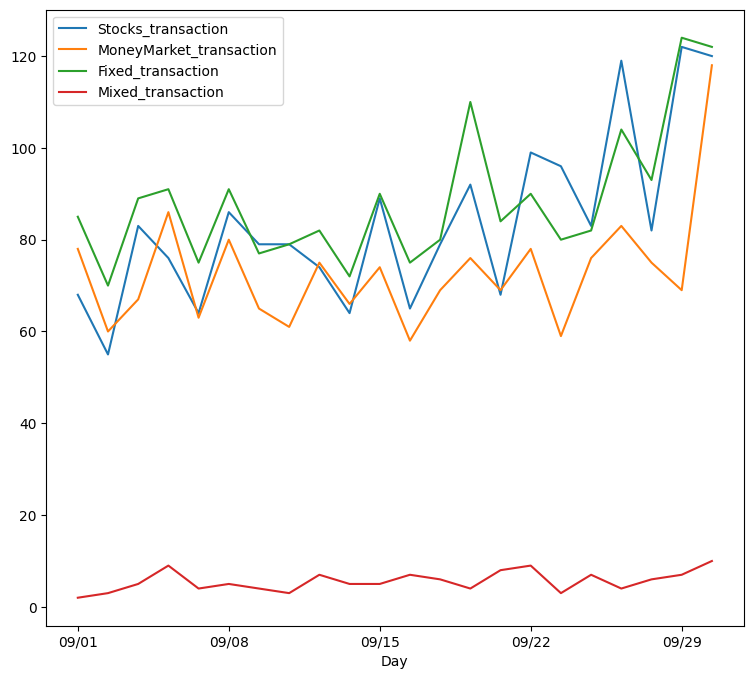

In [ ]:
import pandas as pd
import matplotlib.pyplot as mp

# form dataframe

df1 = pd.DataFrame(NumbTrans_df, columns=['Day',	'Stocks_transaction',	'MoneyMarket_transaction',
                                         'Fixed_transaction',	'Mixed_transaction'])

# plot the dataframe
df1.plot(x='Day', y=['Stocks_transaction',	'MoneyMarket_transaction',
                    'Fixed_transaction',	'Mixed_transaction'], kind="line", figsize=(9, 8))

# print bar graph
mp.show()


## **Insight**

The transaction throughout September 2021 spike towards end of the months.This could be sell or buy, not just buy transaction.

---



# 4. Transaction trends

In [ ]:
#merge dataframe
transcopy = newdf[['user_id','date']]

trans1 = transcopy.merge(nettrans, how = 'inner', on = 'user_id')

trans1

,user_id,date,Stocks_transaction,MoneyMarket_transaction,Fixed_transaction,Mixed_transaction
0,3816789,2021-09-01,100000.00,0.00,0.00,0.00
1,3816789,2021-09-02,100000.00,0.00,0.00,0.00
2,3816789,2021-09-03,100000.00,0.00,0.00,0.00
3,3816789,2021-09-06,100000.00,0.00,0.00,0.00
4,3816789,2021-09-07,100000.00,0.00,0.00,0.00
...,...,...,...,...,...,...
127761,3881981,2021-09-24,10000000.00,10000000.00,40000000.00,0.00
127762,3881981,2021-09-27,10000000.00,10000000.00,40000000.00,0.00
127763,3881981,2021-09-28,10000000.00,10000000.00,40000000.00,0.00
127764,3881981,2021-09-29,10000000.00,10000000.00,40000000.00,0.00


In [ ]:
# Change the date format to month-day
trans2 = trans1.copy()
trans2['date'] = trans2['date'].dt.strftime('%m/%d') 

# Number of transaction per month [gourp by transaction-date]
trans2 = trans2.groupby(trans2['date'])['Stocks_transaction',	'MoneyMarket_transaction',
                                        'Fixed_transaction',	'Mixed_transaction'].agg('sum').reset_index()

trans2.head()


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,date,Stocks_transaction,MoneyMarket_transaction,Fixed_transaction,Mixed_transaction
0,09/01,503250051.00,1190655827.00,1770650814.00,165040043.00
1,09/02,524269235.00,1631577592.00,2015198556.00,165040043.00
2,09/03,604975989.00,1692860112.00,2212284715.00,171597043.00
3,09/06,649226431.00,1747453415.00,2236204615.00,182597043.00
4,09/07,652618672.00,1769303605.00,2256877792.00,186597043.00


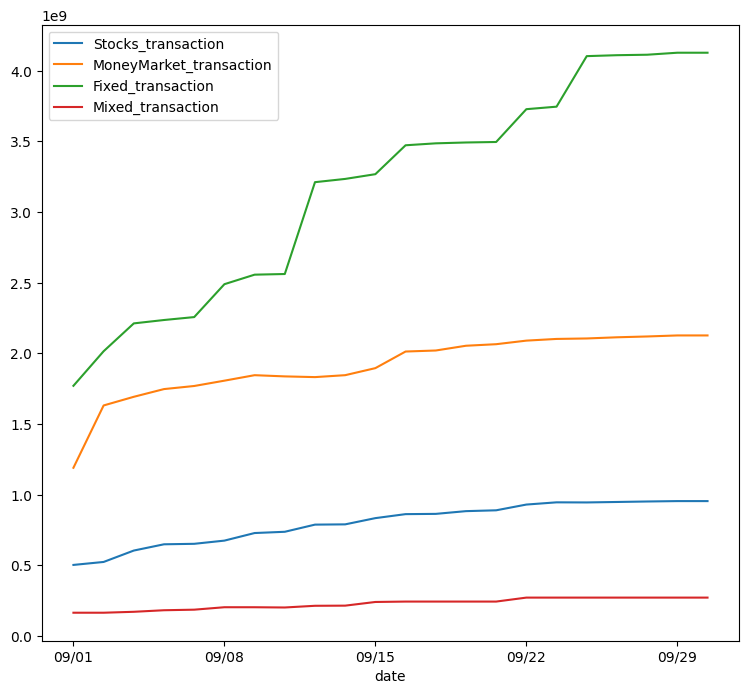

In [ ]:
import pandas as pd
import matplotlib.pyplot as mp

# form dataframe

df3 = pd.DataFrame(trans2, columns=['date',	'Stocks_transaction',	'MoneyMarket_transaction',
                                         'Fixed_transaction',	'Mixed_transaction'])

# plot the dataframe
df3.plot(x='date', y=['Stocks_transaction',	'MoneyMarket_transaction',
                    'Fixed_transaction',	'Mixed_transaction'], kind="line", figsize=(9, 8))

# print bar graph
mp.show()


## **Insight**

The transaction amount for **mixed funds** shows that user did not add any investment nor selling their invested. But there are high amount invested for **fixed income bond** after September,10 until the month ends.

# SEGMENTATION

#Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import cluster
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler
from yellowbrick.cluster import SilhouetteVisualizer

# Data Preparation

In [ ]:
# select transaction for each user
transcount = newdf.copy()
transcount = transcount[['user_id','Stocks_transaction',
                     'MoneyMarket_transaction','Fixed_transaction','Mixed_transaction']]

#Total transaction by user each fund
transcount = transcount.groupby(transcount['user_id']).agg('nunique').reset_index()

# Total transaction in amonth
transcount['trans_count'] = transcount.sum(axis=1)

transcount.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  # Remove the CWD from sys.path while we load stuff.


,user_id,Stocks_transaction,MoneyMarket_transaction,Fixed_transaction,Mixed_transaction,trans_count
0,1004326,1,1,1,0,3
1,1005053,1,1,1,0,3
2,1005165,1,1,1,0,3
3,1018814,0,2,0,0,2
4,1023627,1,0,0,0,1


In [ ]:
# merge all dataframe needed
aumdf1 = aumdf['Total_AUM']


seg1= pd.merge(transcount,aumdf1, on=["user_id"])
seg1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8277 entries, 0 to 8276
Data columns (total 7 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   user_id                  8277 non-null   object 
 1   Stocks_transaction       8277 non-null   int64  
 2   MoneyMarket_transaction  8277 non-null   int64  
 3   Fixed_transaction        8277 non-null   int64  
 4   Mixed_transaction        8277 non-null   int64  
 5   trans_count              8277 non-null   int64  
 6   Total_AUM                8277 non-null   float64
dtypes: float64(1), int64(5), object(1)
memory usage: 517.3+ KB


In [ ]:
# merge all dataframe needed
seg1a = seg1[['user_id','trans_count']]

seg2= pd.merge(seg1a,profit, on=["user_id"])
seg2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2407020 entries, 0 to 2407019
Data columns (total 16 columns):
 #   Column                Dtype  
---  ------                -----  
 0   user_id               object 
 1   trans_count           int64  
 2   user_gender           object 
 3   user_age              int64  
 4   user_occupation       object 
 5   Stocks_AUM            float64
 6   MoneyMarket_AUM       float64
 7   Fixed_AUM             float64
 8   Mixed_AUM             float64
 9   Total_AUM             float64
 10  Stocks_invested       float64
 11  MoneyMarket_invested  float64
 12  Fixed_invested        float64
 13  Mixed_invested        float64
 14  Total_Balance         float64
 15  Total_profit          float64
dtypes: float64(11), int64(2), object(3)
memory usage: 312.2+ MB


In [ ]:
seg = seg2[['user_id','user_gender','user_age','trans_count','Total_AUM','Total_Balance','Total_profit']]

seg.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2407020 entries, 0 to 2407019
Data columns (total 7 columns):
 #   Column         Dtype  
---  ------         -----  
 0   user_id        object 
 1   user_gender    object 
 2   user_age       int64  
 3   trans_count    int64  
 4   Total_AUM      float64
 5   Total_Balance  float64
 6   Total_profit   float64
dtypes: float64(3), int64(2), object(2)
memory usage: 146.9+ MB


In [ ]:
# to drop dulicated data
seg.drop_duplicates(inplace = True)

# to check duplicated data
seg.duplicated().sum()

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


0

In [ ]:
# make a data frame copy
df_cluster = seg.copy()

# then we drop user_id column
df_cluster.drop(columns = 'user_gender', inplace = True )


In [ ]:
# Make user id as index
df_cluster = df_cluster.set_index(['user_id'])
df_cluster

,user_age,trans_count,Total_AUM,Total_Balance,Total_profit
user_id,,,,,
1004326,30,3,205019.00,200000.00,5019.00
1005053,31,3,203671.00,200000.00,3671.00
1005165,22,3,100523.00,100000.00,523.00
1018814,20,2,0.00,0.00,0.00
1023627,33,1,103238.00,100000.00,3238.00
...,...,...,...,...,...
988940,27,3,501937.00,500000.00,1937.00
989618,29,7,2984681.00,3000000.00,-15319.00
990466,33,9,2035652.00,2000000.00,35652.00


# K-Means

In [ ]:
# Initialize KMeans for 4 clusters
cluster_model = KMeans(n_clusters = 4, random_state = 1000)
cluster_model

KMeans(n_clusters=4, random_state=1000)

In [ ]:
# Fit the data into model
cluster_model.fit(df_cluster)

KMeans(n_clusters=4, random_state=1000)

In [ ]:
# Check up cluster label created by the KMeans
cluster_model.labels_

array([0, 0, 0, ..., 0, 0, 0], dtype=int32)

In [ ]:
df_cluster['cluster'] = cluster_model.labels_
df_cluster

,user_age,trans_count,Total_AUM,Total_Balance,Total_profit,cluster
user_id,,,,,,
1004326,30,3,205019.00,200000.00,5019.00,0
1005053,31,3,203671.00,200000.00,3671.00,0
1005165,22,3,100523.00,100000.00,523.00,0
1018814,20,2,0.00,0.00,0.00,0
1023627,33,1,103238.00,100000.00,3238.00,0
...,...,...,...,...,...,...
988940,27,3,501937.00,500000.00,1937.00,0
989618,29,7,2984681.00,3000000.00,-15319.00,0
990466,33,9,2035652.00,2000000.00,35652.00,0


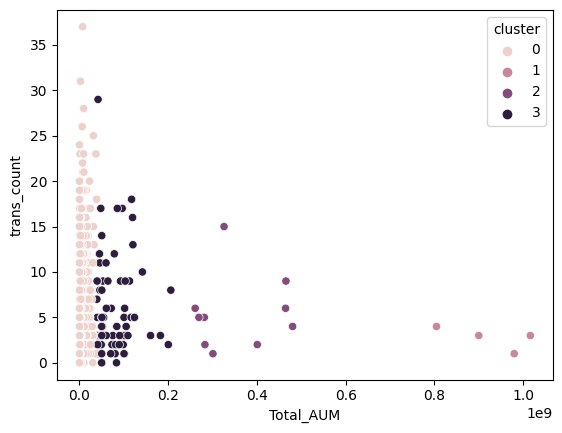

In [ ]:
# Let's re-look into data after clustering
sns.scatterplot(x = 'Total_AUM', y = 'trans_count', data=df_cluster, hue='cluster')

## **Insight**
As we can see from the plot above

*   user with total AUM under 200 M, many having under 10 transactions in September 2021.

* user with total AUM around 200 M - 500 M, did around 5 transactions in September 2021.
* user with total AUM above 800 M, did under 5 transactions through September 2021.

---





# Elbow Method

In [ ]:
# For each n_clusters between 1 and 11, we calculate the distortion value
distortions = []
K = range(1,11)
for n_clusters in K:
  kmeanModel = KMeans(n_clusters, random_state = 42)
  kmeanModel.fit(df_cluster)
  distortions.append(kmeanModel.inertia_)

distortions


[1.0695381785344123e+19,
 3.184746484671491e+18,
 1.328977031658089e+18,
 5.840194008819453e+17,
 3.748648891041347e+17,
 2.2914853718718554e+17,
 1.6988642578455987e+17,
 1.2874954233169891e+17,
 8.968364362753709e+16,
 6.762512070027823e+16]

<Figure size 1000x500 with 0 Axes>

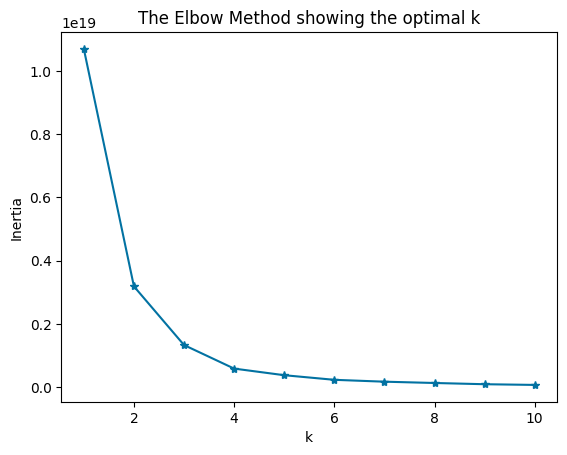

In [ ]:
plt.figure(figsize=(10,5))
plt.figure()
plt.plot(K, distortions, 'b*-')
plt.xlabel('k')
plt.ylabel('Inertia')
plt.title('The Elbow Method showing the optimal k')
plt.show()

## **Insight**

The elbow is formed at cluster 4. We choose it because the elbow curved at k=4.

# Silhouette Analysis

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  "X does not have valid feature names, but"


0.8873682567680535

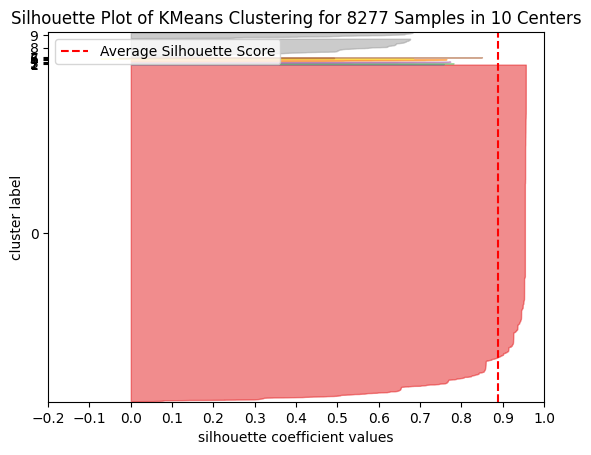

In [ ]:
# Untuk k=4 clusters
cluster_model = KMeans(n_clusters = 4, random_state = 1000)
sil = SilhouetteVisualizer(kmeanModel, is_fitted = True)
sil.fit(df_cluster)
sil.finalize()
sil.silhouette_score_


For k=2, the average silhouette score is 0.9940286019227405
For k=3, the average silhouette score is 0.9887522816271962
For k=4, the average silhouette score is 0.9688545948839268
For k=5, the average silhouette score is 0.9419288881413367
For k=6, the average silhouette score is 0.9420287921152299
For k=7, the average silhouette score is 0.919210116468709
For k=8, the average silhouette score is 0.9192194116555034
For k=9, the average silhouette score is 0.9135610444470403
For k=10, the average silhouette score is 0.8873682567680535


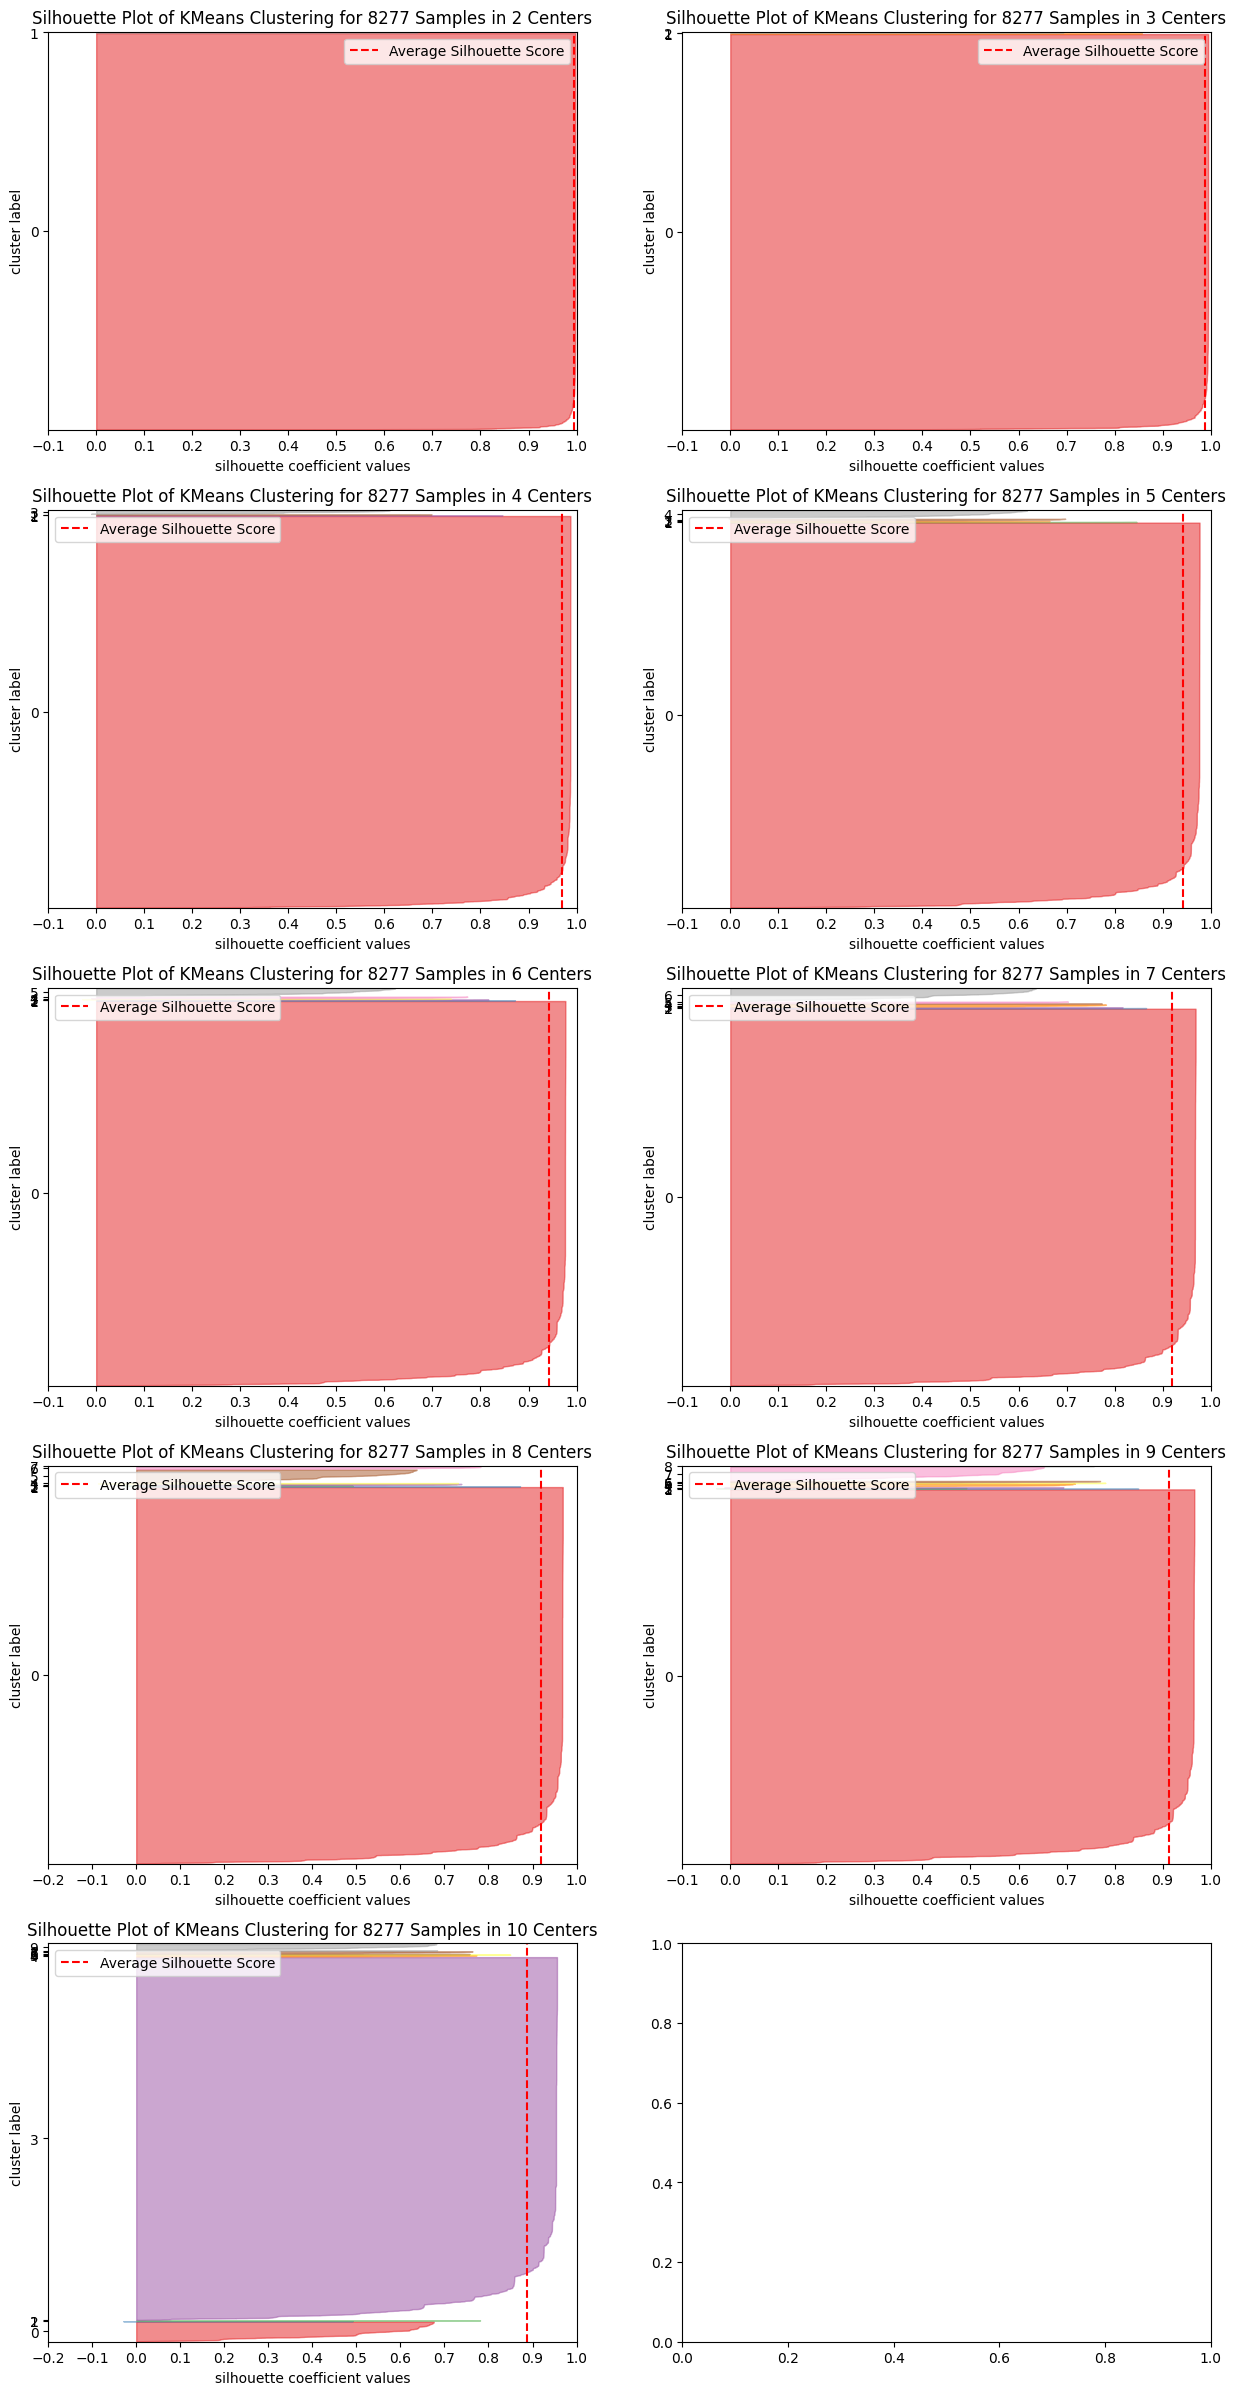

In [ ]:
# Silhouette score plot
K = range(2,11)
max_K = max(K)
fig, ax = plt.subplots(int(np.ceil(max_K/2)), 2, figsize = (15,30))

for n_clusters in K:
  kmeanModel = KMeans(n_clusters)

  q, mod = divmod(n_clusters,2)
  sil = SilhouetteVisualizer(kmeanModel, is_fitted = False, ax = ax[q-1][mod])
  sil.fit(df_cluster)
  sil.finalize()
  print(f"For k={n_clusters}, the average silhouette score is {sil.silhouette_score_}")

In [ ]:
# Let's get the label for k = 3

# Initialize KMeans for 3 clusters
cluster_model = KMeans(n_clusters = 4, random_state = 42)

# Fit the data into model
cluster_model.fit(df_cluster)

# 
clusterdf = df_cluster.copy()
clusterdf['cluster'] = cluster_model.labels_
clusterdf

,user_age,trans_count,Total_AUM,Total_Balance,Total_profit,cluster
user_id,,,,,,
1004326,30,3,205019.00,200000.00,5019.00,0
1005053,31,3,203671.00,200000.00,3671.00,0
1005165,22,3,100523.00,100000.00,523.00,0
1018814,20,2,0.00,0.00,0.00,0
1023627,33,1,103238.00,100000.00,3238.00,0
...,...,...,...,...,...,...
988940,27,3,501937.00,500000.00,1937.00,0
989618,29,7,2984681.00,3000000.00,-15319.00,0
990466,33,9,2035652.00,2000000.00,35652.00,0


In [ ]:
# Aggregating by cluster
clusterdf.groupby(['cluster']).agg(['mean'])

,user_age,trans_count,Total_AUM,Total_Balance,Total_profit
,mean,mean,mean,mean,mean
cluster,,,,,
0,27.10,3.58,1012998.76,1006619.38,6379.38
1,28.50,2.75,925155449.50,920550187.75,4605261.75
2,46.40,5.50,353202535.60,353766999.90,-564464.30
3,37.29,5.82,76734167.89,76479379.99,254787.91


In [ ]:
clusterdf.groupby(['cluster'])['user_age'].agg(['count','mean','median','max','min'])

,count,mean,median,max,min
cluster,,,,,
0,8187,27.10,25.00,83,17
1,4,28.50,29.00,33,23
2,10,46.40,42.50,82,27
3,76,37.29,34.00,64,23


In [ ]:
clusterdf.groupby(['cluster'])['trans_count'].agg(['count','mean','median','max','min'])

,count,mean,median,max,min
cluster,,,,,
0,8187,3.58,3.00,37,0
1,4,2.75,3.00,4,1
2,10,5.50,5.00,15,1
3,76,5.82,4.00,29,0


In [ ]:
clusterdf.groupby(['cluster'])['Total_AUM'].agg(['count','mean','median','max','min'])

,count,mean,median,max,min
cluster,,,,,
0,8187,1012998.76,101873.00,38775071.00,0.00
1,4,925155449.50,939858032.50,1016171140.00,804734593.00
2,10,353202535.60,313356876.50,480469387.00,260743653.00
3,76,76734167.89,60407904.50,205951684.00,39265997.00


In [ ]:
clusterdf.groupby(['cluster'])['Total_profit'].agg(['count','mean','median','max','min'])

,count,mean,median,max,min
cluster,,,,,
0,8187,6379.38,579.00,1412799.00,-2907393.00
1,4,4605261.75,4352491.00,9766956.00,-50891.00
2,10,-564464.30,856876.50,2393432.00,-17203530.00
3,76,254787.91,278095.50,2628315.00,-3634241.00


# RFM

# Data Preparation

In [ ]:
newdf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 127766 entries, 0 to 127765
Data columns (total 19 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   user_id                  127766 non-null  object        
 1   user_gender              127766 non-null  object        
 2   user_age                 127766 non-null  int64         
 3   user_occupation          127766 non-null  object        
 4   user_income_range        127766 non-null  object        
 5   user_income_source       127766 non-null  object        
 6   date                     127766 non-null  datetime64[ns]
 7   Stocks_AUM               85346 non-null   float64       
 8   Stocks_invested          85346 non-null   float64       
 9   Stocks_transaction       81984 non-null   float64       
 10  MoneyMarket_AUM          105472 non-null  float64       
 11  MoneyMarket_invested     105472 non-null  float64       
 12  MoneyMarket_tran

In [ ]:
# find recency for stocks
dfrccstocks = newdf.copy ()
dfrccstocks = dfrccstocks[['user_id','date','Stocks_transaction']]

# drop 0 value
dfrccstocks= dfrccstocks[dfrccstocks['Stocks_transaction'] > 0]

dfrccstocks.head()

,user_id,date,Stocks_transaction
11,3816789,2021-09-16,100000.00
32,3802293,2021-09-15,2320000.00
38,3802293,2021-09-23,3300000.00
59,3783302,2021-09-17,370000.00
104,3820160,2021-09-20,30000.00


In [ ]:
# stock market recency

stockrecency = dfrccstocks.groupby(by='user_id',
						as_index=False)['date'].max()
stockrecency.columns = ['user_id', 'LastPurchaseDate']
recent_date = stockrecency['LastPurchaseDate'].max()
stockrecency['SRecency'] = stockrecency['LastPurchaseDate'].apply(
	lambda x: (recent_date - x).days)
stockrecency.head()


,user_id,LastPurchaseDate,SRecency
0,103108,2021-09-09,21
1,1035424,2021-09-22,8
2,1050345,2021-09-30,0
3,1062501,2021-09-03,27
4,1098153,2021-09-28,2


In [ ]:
# find recency for money market
dfrccmoney = newdf.copy ()
dfrccmoney = dfrccmoney[['user_id','date','MoneyMarket_transaction']]

# drop 0 value
dfrccmoney= dfrccmoney[dfrccmoney['MoneyMarket_transaction'] > 0]

dfrccmoney.head()

,user_id,date,MoneyMarket_transaction
32,3802293,2021-09-15,350000.00
38,3802293,2021-09-23,500000.00
59,3783302,2021-09-17,100000.00
342,3837099,2021-09-07,20000000.00
346,3837099,2021-09-13,20000000.00


In [ ]:
# moneymarket recency

moneyrecency = dfrccmoney.groupby(by='user_id',
						as_index=False)['date'].max()
moneyrecency.columns = ['user_id', 'LastPurchaseDate']
recent_date = moneyrecency['LastPurchaseDate'].max()
moneyrecency['MMRecency'] = moneyrecency['LastPurchaseDate'].apply(
	lambda x: (recent_date - x).days)
moneyrecency.head()

,user_id,LastPurchaseDate,MMRecency
0,1050345,2021-09-30,0
1,1062501,2021-09-03,27
2,1069582,2021-09-30,0
3,1098153,2021-09-28,2
4,1100310,2021-09-24,6


In [ ]:
# find recency for fixed income
dfrccfixed = newdf.copy ()
dfrccfixed = dfrccfixed[['user_id','date','Fixed_transaction']]

# drop 0 value
dfrccfixed= dfrccfixed[dfrccfixed['Fixed_transaction'] > 0]

dfrccfixed.head()

,user_id,date,Fixed_transaction
32,3802293,2021-09-15,830000.00
38,3802293,2021-09-23,1200000.00
59,3783302,2021-09-17,530000.00
104,3820160,2021-09-20,50000.00
538,3345068,2021-09-02,30000.00


In [ ]:
# fixed income recency

fixedrecency = dfrccfixed.groupby(by='user_id',
						as_index=False)['date'].max()
fixedrecency.columns = ['user_id', 'LastPurchaseDate']
recent_date = fixedrecency['LastPurchaseDate'].max()
fixedrecency['FIXRecency'] = fixedrecency['LastPurchaseDate'].apply(
	lambda x: (recent_date - x).days)
fixedrecency.head()

,user_id,LastPurchaseDate,FIXRecency
0,1024581,2021-09-10,20
1,1050345,2021-09-30,0
2,1062501,2021-09-03,27
3,1098153,2021-09-28,2
4,111603,2021-09-24,6


In [ ]:
# find recency for mixed funds
dfrccmixed = newdf.copy ()
dfrccmixed = dfrccmixed[['user_id','date','Mixed_transaction']]

# drop 0 value
dfrccmixed= dfrccmixed[dfrccmixed['Mixed_transaction'] > 0]

dfrccmixed.head()

,user_id,date,Mixed_transaction
50,3049927,2021-09-30,149000.00
1327,3787804,2021-09-06,1000000.00
1331,3787804,2021-09-10,2000000.00
1337,3787804,2021-09-20,500000.00
1338,3787804,2021-09-21,500000.00


In [ ]:
# mixed funds recency

mixedrecency = dfrccmixed.groupby(by='user_id',
						as_index=False)['date'].max()
mixedrecency.columns = ['user_id', 'LastPurchaseDate']
recent_date = mixedrecency['LastPurchaseDate'].max()
mixedrecency['MIXRecency'] = mixedrecency['LastPurchaseDate'].apply(
	lambda x: (recent_date - x).days)
mixedrecency.head()

,user_id,LastPurchaseDate,MIXRecency
0,2018940,2021-09-22,8
1,3049927,2021-09-30,0
2,3263489,2021-09-06,24
3,3284379,2021-09-02,28
4,3662093,2021-09-06,24


In [ ]:
#merge recency dataset

rcc1 = stockrecency.set_index('user_id').combine_first(moneyrecency.set_index('user_id')).reset_index()
rcc1


,user_id,LastPurchaseDate,MMRecency,SRecency
0,103108,2021-09-09,NaN,21.00
1,1035424,2021-09-22,NaN,8.00
2,1050345,2021-09-30,0.00,0.00
3,1062501,2021-09-03,27.00,27.00
4,1069582,2021-09-30,0.00,NaN
...,...,...,...,...
2546,979998,2021-09-30,NaN,0.00
2547,984729,2021-09-01,29.00,NaN
2548,989618,2021-09-02,28.00,28.00
2549,990466,2021-09-30,0.00,0.00


In [ ]:
rcc2 = rcc1.set_index('user_id').combine_first(fixedrecency.set_index('user_id')).reset_index()
rcc2


,user_id,FIXRecency,LastPurchaseDate,MMRecency,SRecency
0,1024581,20.00,2021-09-10,NaN,NaN
1,103108,NaN,2021-09-09,NaN,21.00
2,1035424,NaN,2021-09-22,NaN,8.00
3,1050345,0.00,2021-09-30,0.00,0.00
4,1062501,27.00,2021-09-03,27.00,27.00
...,...,...,...,...,...
3025,979998,16.00,2021-09-30,NaN,0.00
3026,984729,NaN,2021-09-01,29.00,NaN
3027,989618,8.00,2021-09-02,28.00,28.00
3028,990466,1.00,2021-09-30,0.00,0.00


In [ ]:
rcc3 = rcc2.set_index('user_id').combine_first(mixedrecency.set_index('user_id')).reset_index()
rcc3

,user_id,FIXRecency,LastPurchaseDate,MIXRecency,MMRecency,SRecency
0,1024581,20.00,2021-09-10,NaN,NaN,NaN
1,103108,NaN,2021-09-09,NaN,NaN,21.00
2,1035424,NaN,2021-09-22,NaN,NaN,8.00
3,1050345,0.00,2021-09-30,NaN,0.00,0.00
4,1062501,27.00,2021-09-03,NaN,27.00,27.00
...,...,...,...,...,...,...
3047,979998,16.00,2021-09-30,NaN,NaN,0.00
3048,984729,NaN,2021-09-01,NaN,29.00,NaN
3049,989618,8.00,2021-09-02,NaN,28.00,28.00
3050,990466,1.00,2021-09-30,NaN,0.00,0.00


In [ ]:
recency = rcc3.copy()
# drop last purchase date column

recency.drop('LastPurchaseDate', inplace=True, axis=1)

# fill missing value
recency.fillna(0)

# sum all recency
recency['Recency']= recency.sum(axis=1)

recency.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  # Remove the CWD from sys.path while we load stuff.


,user_id,FIXRecency,MIXRecency,MMRecency,SRecency,Recency
0,1024581,20.00,NaN,NaN,NaN,20.00
1,103108,NaN,NaN,NaN,21.00,21.00
2,1035424,NaN,NaN,NaN,8.00,8.00
3,1050345,0.00,NaN,0.00,0.00,0.00
4,1062501,27.00,NaN,27.00,27.00,81.00


In [ ]:
#merge data
df_seg = seg.copy()

In [ ]:
recency1 = recency[['user_id','Recency']]
recency1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3052 entries, 0 to 3051
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   user_id  3052 non-null   object 
 1   Recency  3052 non-null   float64
dtypes: float64(1), object(1)
memory usage: 47.8+ KB


In [ ]:
df_seg = df_seg.set_index('user_id').combine_first(recency1.set_index('user_id')).reset_index()
df_seg

,user_id,Recency,Total_AUM,Total_Balance,Total_profit,trans_count,user_age,user_gender
0,1004326,NaN,205019.00,200000.00,5019.00,3,30,Female
1,1005053,NaN,203671.00,200000.00,3671.00,3,31,Male
2,1005165,NaN,100523.00,100000.00,523.00,3,22,Female
3,1018814,NaN,0.00,0.00,0.00,2,20,Male
4,1023627,NaN,103238.00,100000.00,3238.00,1,33,Male
...,...,...,...,...,...,...,...,...
8272,988940,NaN,501937.00,500000.00,1937.00,3,27,Male
8273,989618,64.00,2984681.00,3000000.00,-15319.00,7,29,Male
8274,990466,1.00,2035652.00,2000000.00,35652.00,9,33,Male
8275,99245,NaN,1002610.00,1000000.00,2610.00,2,25,Male


In [ ]:
df_seg.fillna(0)

,user_id,Recency,Total_AUM,Total_Balance,Total_profit,trans_count,user_age,user_gender
0,1004326,0.00,205019.00,200000.00,5019.00,3,30,Female
1,1005053,0.00,203671.00,200000.00,3671.00,3,31,Male
2,1005165,0.00,100523.00,100000.00,523.00,3,22,Female
3,1018814,0.00,0.00,0.00,0.00,2,20,Male
4,1023627,0.00,103238.00,100000.00,3238.00,1,33,Male
...,...,...,...,...,...,...,...,...
8272,988940,0.00,501937.00,500000.00,1937.00,3,27,Male
8273,989618,64.00,2984681.00,3000000.00,-15319.00,7,29,Male
8274,990466,1.00,2035652.00,2000000.00,35652.00,9,33,Male
8275,99245,0.00,1002610.00,1000000.00,2610.00,2,25,Male


In [ ]:
df_seg.isna().sum()

user_id             0
Recency          5225
Total_AUM           0
Total_Balance       0
Total_profit        0
trans_count         0
user_age            0
user_gender         0
dtype: int64

In [ ]:

# creating bool series True for NaN values
bool_series = pd.isnull(df_seg["Recency"])

# filtering data
# displaying data only with Gender = NaN
df_seg[bool_series]


,user_id,Recency,Total_AUM,Total_Balance,Total_profit,trans_count,user_age,user_gender
0,1004326,NaN,205019.00,200000.00,5019.00,3,30,Female
1,1005053,NaN,203671.00,200000.00,3671.00,3,31,Male
2,1005165,NaN,100523.00,100000.00,523.00,3,22,Female
3,1018814,NaN,0.00,0.00,0.00,2,20,Male
4,1023627,NaN,103238.00,100000.00,3238.00,1,33,Male
...,...,...,...,...,...,...,...,...
8267,978972,NaN,101884.00,100000.00,1884.00,3,22,Male
8269,980906,NaN,12743.00,12195.00,548.00,2,19,Female
8270,981852,NaN,100132.00,100000.00,132.00,1,23,Female
8272,988940,NaN,501937.00,500000.00,1937.00,3,27,Male


In [ ]:
df_seg['Recency'] = df_seg['Recency'].fillna(0)

In [ ]:
df_seg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8277 entries, 0 to 8276
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   user_id        8277 non-null   object 
 1   Recency        8277 non-null   float64
 2   Total_AUM      8277 non-null   float64
 3   Total_Balance  8277 non-null   float64
 4   Total_profit   8277 non-null   float64
 5   trans_count    8277 non-null   int64  
 6   user_age       8277 non-null   int64  
 7   user_gender    8277 non-null   object 
dtypes: float64(4), int64(2), object(2)
memory usage: 517.4+ KB


In [ ]:
df_seg['Recency'] = df_seg['Recency'].astype(np.int64)
df_seg['Total_AUM'] = df_seg['Total_AUM'].astype(np.int64)
df_seg['Total_Balance'] = df_seg['Total_Balance'].astype(np.int64)
df_seg['Total_profit'] = df_seg['Total_profit'].astype(np.int64)

df_seg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8277 entries, 0 to 8276
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   user_id        8277 non-null   object
 1   Recency        8277 non-null   int64 
 2   Total_AUM      8277 non-null   int64 
 3   Total_Balance  8277 non-null   int64 
 4   Total_profit   8277 non-null   int64 
 5   trans_count    8277 non-null   int64 
 6   user_age       8277 non-null   int64 
 7   user_gender    8277 non-null   object
dtypes: int64(6), object(2)
memory usage: 517.4+ KB


In [ ]:
df_seg1 = df_seg.copy()

# drop 0 value
#df_seg1= df_seg1[df_seg1['Total_Balance'] > 0]
df_seg1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8277 entries, 0 to 8276
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   user_id        8277 non-null   object
 1   Recency        8277 non-null   int64 
 2   Total_AUM      8277 non-null   int64 
 3   Total_Balance  8277 non-null   int64 
 4   Total_profit   8277 non-null   int64 
 5   trans_count    8277 non-null   int64 
 6   user_age       8277 non-null   int64 
 7   user_gender    8277 non-null   object
dtypes: int64(6), object(2)
memory usage: 517.4+ KB


# **Data Processing**

In [ ]:
!pip install pandasql

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# RFM Analysis
# source: https://www.putler.com/rfm-analysis/

from pandasql import sqldf
pysqldfX = lambda q,ctx: sqldf(q, ctx)

In [ ]:
import pandas as pd

class RFM():
  def __init__(self, 
        id_colname:str = 'id', 
        recency_colname:str = 'recency', 
        frequency_colname:str = 'frequency', 
        monetary_colname:str = 'monetary',
        num_cluster:int = 5
    ):
    self.id_colname = id_colname;
    self.recency_colname = recency_colname;
    self.frequency_colname = frequency_colname;
    self.monetary_colname = monetary_colname;
    self.num_cluster = num_cluster;
    #------------------------------------------
    self.dict_rfm_reference = {
      "Champions":{
        "Segment":"Champions",
        "Activity":"Bought recently, buy often and spend the most!",
        "Actionable":"Reward them. Can be early adopters for new products. Will promote your brand."
      },
      "Loyal Customers":{
        "Segment":"Loyal Customers",
        "Activity":"Spend good money with us often. Responsive to promotions.",
        "Actionable":"Upsell higher value products. Ask for reviews. Engage them."
      },
      "Potential Loyalist":{
        "Segment":"Potential Loyalist",
        "Activity":"Recent customers, but spent a good amount and bought more than once.",
        "Actionable":"Offer membership / loyalty program, recommend other products."
      },
      "Recent Customers":{
        "Segment":"Recent Customers",
        "Activity":"Bought most recently, but not often.",
        "Actionable":"Provide on-boarding support, give them early success, start building relationship."
      },
      "Promising":{
        "Segment":"Promising",
        "Activity":"Recent shoppers, but haven’t spent much.",
        "Actionable":"Create brand awareness, offer free trials"
      },
      "Customers Needing Attention":{
        "Segment":"Customers Needing Attention",
        "Activity":"Above average recency, frequency and monetary values. May not have bought very recently though.",
        "Actionable":"Make limited time offers, Recommend based on past purchases. Reactivate them."
      },
      "About To Sleep":{
        "Segment":"About To Sleep",
        "Activity":"Below average recency, frequency and monetary values. Will lose them if not reactivated.",
        "Actionable":"Share valuable resources, recommend popular products / renewals at discount, reconnect with them."
      },
      "At Risk":{
        "Segment":"At Risk",
        "Activity":"Spent big money and purchased often. But long time ago. Need to bring them back!",
        "Actionable":"Send personalized emails to reconnect, offer renewals, provide helpful resources."
      },
      "Can’t Lose Them":{
        "Segment":"Can’t Lose Them",
        "Activity":"Made biggest purchases, and often. But haven’t returned for a long time.",
        "Actionable":"Win them back via renewals or newer products, don’t lose them to competition, talk to them."
      },
      "Hibernating":{
        "Segment":"Hibernating",
        "Activity":"Last purchase was long back, low spenders and low number of orders.",
        "Actionable":"Offer other relevant products and special discounts. Recreate brand value."
      },
      "Lost":{
        "Segment":"Lost",
        "Activity":"Lowest recency, frequency and monetary scores.",
        "Actionable":"Revive interest with reach out campaign, ignore otherwise."
      }
    };

    _segments = {
      "Champions":[555, 554, 544, 545, 454, 455, 445],
      "Loyal Customers":[543, 444, 435, 355, 354, 345, 344, 335],
      "Potential Loyalist":[553, 551,552, 541, 542, 533, 532, 531, 452, 451, 442, 441, 431, 453, 433, 432, 423, 353, 352, 351, 342, 341, 333, 323],
      "Recent Customers":[512, 511, 422, 421, 412, 411, 311],
      "Promising":[525, 524, 523, 522, 521, 515, 514, 513, 425, 424, 413,414, 415, 315, 314, 313],
      "Customers Needing Attention":[535, 534, 443, 434, 343, 334, 325, 324],
      "About To Sleep":[331, 321, 312, 221, 213],
      "At Risk":[255, 254, 245, 244, 253, 252, 243, 242, 235, 234, 225, 224, 153, 152, 145, 143, 142, 135, 134, 133, 125, 124],
      "Can’t Lose Them":[155, 154, 144, 214,215,115, 114, 113],
      "Hibernating":[332, 322, 231, 241, 251, 233, 232, 223, 222, 132, 123, 122, 212, 211],
      "Lost":[111, 112, 121, 131,141,151]
    }

    self.df_rfm_segmentation = {};
    for _segment in _segments.keys():
      for _rfm_score in _segments[_segment]:
        self.df_rfm_segmentation[str(_rfm_score)] = self.dict_rfm_reference[_segment];

    #------------------------------------------
    self.df_recency_model = None;
    self.df_frequency_model = None;
    self.df_monetary_model = None;
  
  def __get_rfm_dataset_query__(self)->str:
    return f"""
      select 
        "{self.id_colname}" as id, 
        "{self.recency_colname}" as recency,
        "{self.frequency_colname}" as frequency,
        "{self.monetary_colname}" as monetary 
      from df
    """;

  def extract_dataset(self,df_x):
    #step 0: extract the dataset
    str_query = self.__get_rfm_dataset_query__();
    df_rfm_dataset = pysqldfX(str_query,{"df":df_x});
    return df_rfm_dataset;

  def get_feature_clusters(self, df_rfm_dataset) -> pd.DataFrame:
    df_rfm_dataset['recency_score'] = self.num_cluster - pd.qcut(
        x=df_rfm_dataset['recency'].values,
        q=self.num_cluster, labels = False
    );
    df_rfm_dataset['frequency_score'] = pd.qcut(
        x=df_rfm_dataset['frequency'].values,
        q=self.num_cluster, labels = False
    )+1;
    df_rfm_dataset['monetary_score'] = pd.qcut(
        x=df_rfm_dataset['monetary'].values,
        q=self.num_cluster, labels = False
    )+1;
    self.df_recency_model = pysqldfX("""
      select 'recency' as label, recency_score as score, min(recency) as min, max(recency) as max 
      from df group by recency_score order by recency_score desc
    """,{"df":df_rfm_dataset});
    self.df_frequency_model = pysqldfX("""
      select 'frequency' as label, frequency_score as score, min(frequency) as min, max(frequency) as max 
      from df group by frequency_score order by frequency_score asc
    """,{"df":df_rfm_dataset});
    self.df_monetary_model = pysqldfX("""
      select 'monetary' as label, monetary_score as score, min(monetary) as min, max(monetary) as max 
      from df group by monetary_score order by monetary_score asc
    """,{"df":df_rfm_dataset});

  def generate_sql_model(self, df_x):
    label = df_x['label'].unique()[0];
    _cache = [];
    row_counts = df_x.shape[0];
    for i in range(0, row_counts):
      if(i+1<row_counts):
        _cache.append(f"""when {label} <= {df_x['max'][i]} then {df_x['score'][i]}""");
      else:
        _cache.append(f"""when {label} > {df_x['max'][i-1]} then {df_x['score'][i]}""");
    _str = "\n".join(_cache);
    return f"""(case {_str} end) as {label}_score""";

  def score(self, df_x) -> pd.DataFrame:
    #step 0: extract the dataset
    df_rfm_dataset = self.extract_dataset(df_x);

    str_query = f"""
      with tmp as (
        select df.*,
          {self.generate_sql_model(self.df_recency_model)},
          {self.generate_sql_model(self.df_frequency_model)},
          {self.generate_sql_model(self.df_monetary_model)}
        from df
      )
      select tmp.*, (recency_score||frequency_score||monetary_score) as rfm_score
      from tmp
    """;
    return pysqldfX(str_query,{"df":df_rfm_dataset});

  def label_samples(self, df_rfm_feature_scored) -> pd.DataFrame:
    label_ref = [];
    for i in range(0,df_rfm_feature_scored.shape[0]):
      label_ref.append(
          self.df_rfm_segmentation[str(df_rfm_feature_scored['rfm_score'][i])]
      );
    return pd.concat([df_rfm_feature_scored, pd.DataFrame(label_ref)],axis=1);

  def fit(self, df_x):
    #step 0: extract the dataset
    df_rfm_dataset = self.extract_dataset(df_x);

    #step 1: divide each RFM feature into n buckets
    df_rfm_dataset = self.get_feature_clusters(df_rfm_dataset);

  def transform(self, df_x) -> pd.DataFrame:
    #step 2: score each feature based on model
    df_rfm_feature_scored = self.score(df_x);

    #step 3: map each row with their reference table
    df_rfm_feature_labeled = self.label_samples(df_rfm_feature_scored);

    return df_rfm_feature_labeled;

  def fit_transform(self, df_x: pd.DataFrame) -> pd.DataFrame :
    self.fit(df_x);
    return self.transform(df_x);

In [ ]:
#Step 1: divide each RFM feature into 5 buckets
rfm = RFM(
    id_colname ='user_id',
    recency_colname = 'Recency', 
    frequency_colname = 'trans_count', 
    monetary_colname = 'Total_Balance'
);
rfm.fit(df_seg);

ValueError: ignored